In [1]:
%load_ext autoreload
%autoreload 2

import main as m
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
R = 8.314 # J/K. mol

In [505]:
n = 1000
Ca = m.generate_values(1, 10, n)
Cb = m.generate_values(1, 10, n)
Cc = m.generate_values(0, .1, n)
Cd = m.generate_values(0, .1, n)
T = m.generate_values(50+273, 200+273, n)
Q = m.generate_values(.1, .15, n)

data = pd.DataFrame()
data['Cae'] = Ca
data['Cbe'] = Cb
data['Cce'] = Cc
data['Cde'] = Cd
data['T'] = T
data['Q'] = Q
C = ['Cae', 'Cbe', 'Cce', 'Cde']

In [548]:
Ea1 = 53e3 # J/mol
k01 = 5e3 # L/mol.s
Ea2 = Ea1/1.3 # J/mol
k02 = 5e1 # L/mol.s
V = 500 # L
# C: mol/L
# Q: L/s


data['Ea1'] = Ea1
data['k01'] = k01
data['Ea2'] = Ea2
data['k02'] = k02
data['V'] = V

## Ordinary Diferential Equation

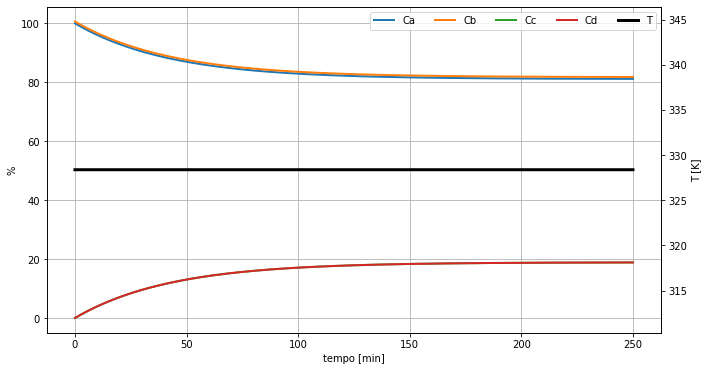

In [ ]:
ode_solved = m.ode_solve(data, n=10*n, t=15000, row=1)
m.ode_plot(ode_solved)

In [593]:
ro = 1
data.loc[[ro]]

,Cae,Cbe,Cce,Cde,T,Q,Ea1,k01,Ea2,k02,V
1,3.960112,3.985584,0.000706,0.000647,328.379442,0.122607,53000.0,5000.0,40769.230769,50.0,500


In [594]:
print(f"k1: {m.cte_taxa(data.loc[ro, 'T'], data.loc[ro, 'k01'], data.loc[ro, 'Ea1'])*1e3:.2f} .10^-3")
print(f"k2: {m.cte_taxa(data.loc[ro, 'T'], data.loc[ro, 'k02'], data.loc[ro, 'Ea2'])*1e3:.2f} .10^-3")
print(f"X: {m.X( ode_solved['Ca'].values[0], ode_solved['Ca'].values[-1] ):.2f}")

k1: 0.02 .10^-3
k2: 0.02 .10^-3
X: 0.19


## Steady State

In [595]:
out = m.ss_solve(data)

In [596]:
data1 = data.drop(columns=['T']).join(out)
data1.to_csv(f'data_Ea{Ea1}_k0{k01}_V{V}_K2.csv')